In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../project_data/PAS+crime+extra_final.csv')

In [3]:
df.shape[0]

75912

In [4]:
df.dropna(subset=['Q60'], inplace=True)
df = df[df['Q60'] < 95]
print(df.shape[0])

73124


In [5]:
columns_to_drop = df.filter(regex='^WT_').columns
df = df.drop(columns=columns_to_drop)
print(df.shape[0])
print(df.shape[1])

73124
599


In [6]:

df_monthdict = pd.read_csv('month_year_dict.csv')

# Create a dictionary to map Month_Number to Month_Year
month_dict = dict(zip(df_monthdict['Month_Number'], df_monthdict['Month_Year']))

# Map the Month_Number to Month_Year in the original DataFrame
df['Month_Number'] = df['Month_Number'].map(month_dict)

# Convert Month_Year to datetime
df['Month_Number'] = pd.to_datetime(df['Month_Number'], format='%b %Y')


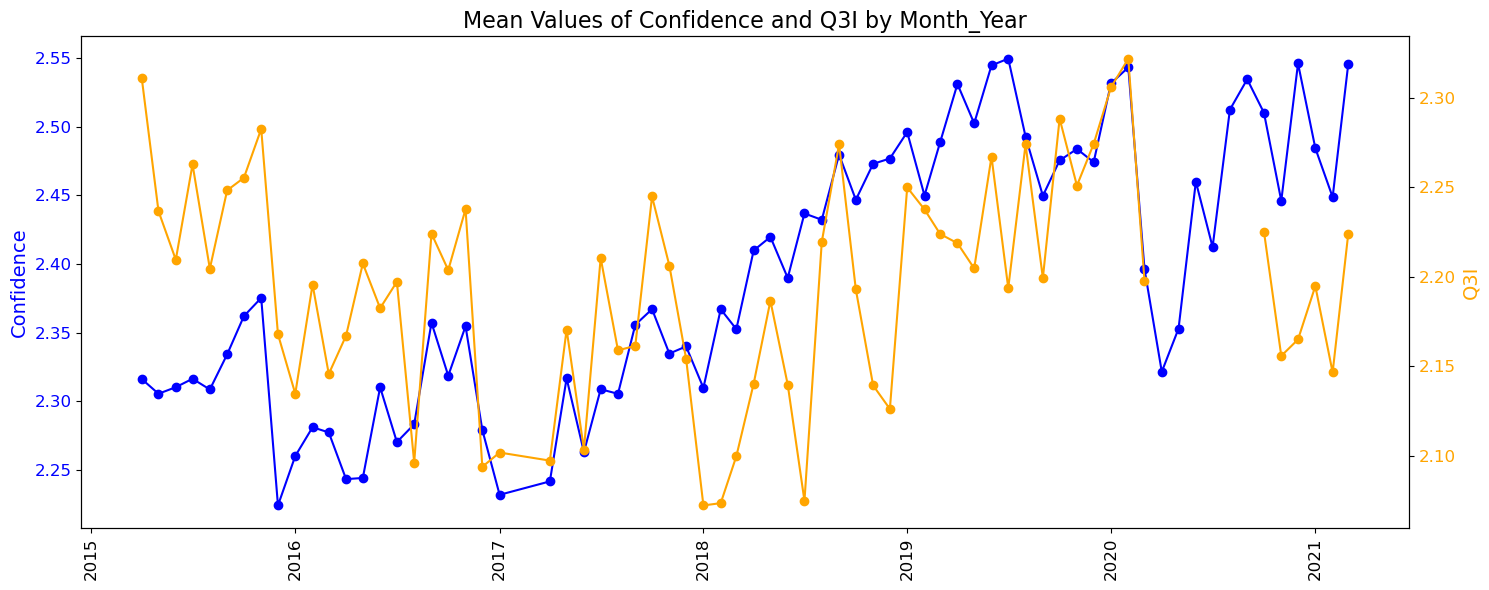

In [8]:
# Calculate mean values
mean_values = df.groupby('Month_Number').mean().reset_index()

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot mean Q60 on primary y-axis
ax1.plot(mean_values['Month_Number'], mean_values['Q60'], color='blue', marker='o', label='Q60')
# ax1.set_xlabel('Month_Year', fontsize=14)
ax1.set_ylabel('Confidence', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.tick_params(axis='x', rotation=90, labelsize=12)

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(mean_values['Month_Number'], mean_values['Q3I'], color='orange', marker='o', label='Q3I')
ax2.set_ylabel('Q3I', color='orange', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange', labelsize=12)

# Title and show plot
plt.title('Mean Values of Confidence and Q3I by Month_Year', fontsize=16)
fig.tight_layout()
plt.savefig('Q3I_plot.png')
plt.show()

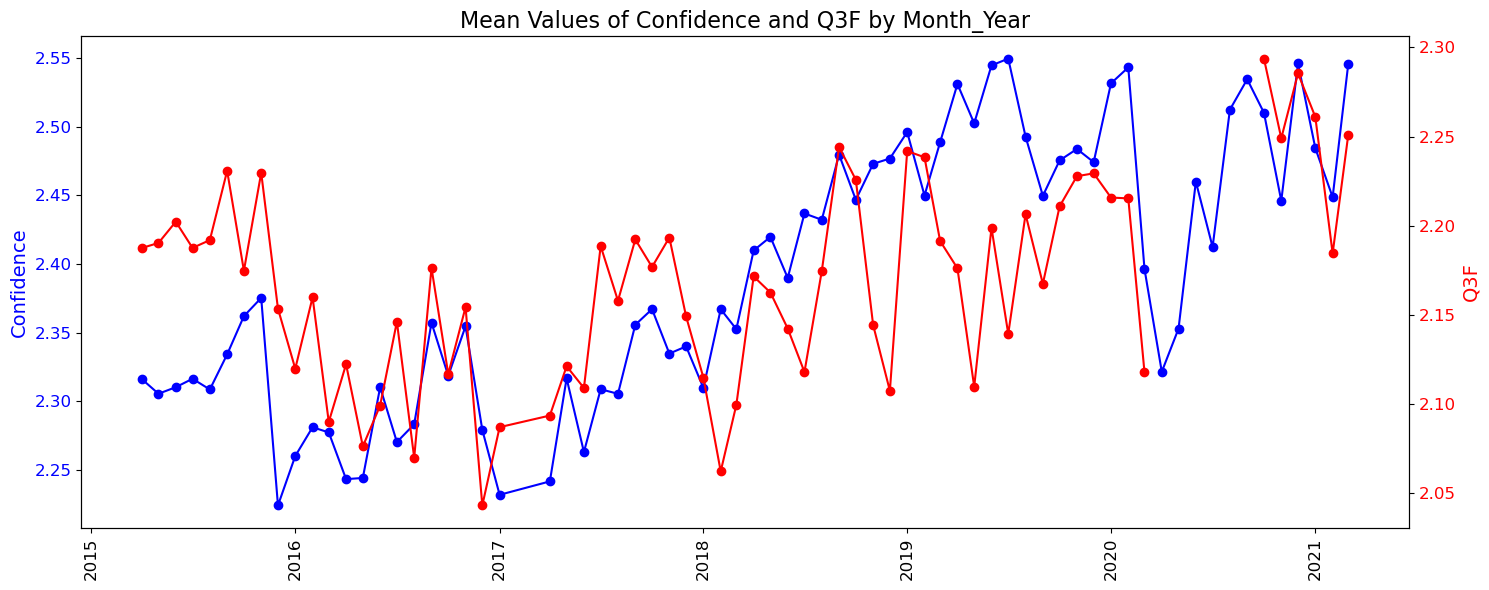

In [9]:
# Calculate mean values
mean_values = df.groupby('Month_Number').mean().reset_index()

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot mean Q60 on primary y-axis
ax1.plot(mean_values['Month_Number'], mean_values['Q60'], color='blue', marker='o', label='Q60')
#ax1.set_xlabel('Month_Year', fontsize=14)
ax1.set_ylabel('Confidence', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.tick_params(axis='x', rotation=90, labelsize=12)

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(mean_values['Month_Number'], mean_values['Q3F'], color='red', marker='o', label='Q3F')
ax2.set_ylabel('Q3F', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)

# Title and show plot
plt.title('Mean Values of Confidence and Q3F by Month_Year', fontsize=16)
fig.tight_layout()
plt.savefig('Q3F_plot.png')
plt.show()

In [10]:
answer_map5 = {
'Barking and Dagenham': 1,
'Barnet': 2,
'Bexley': 3,
'Brent': 4,
'Bromley': 5,
'Camden': 6,
'Croydon': 7,
'Ealing': 8,
'Enfield': 9,
'Greenwich': 10,
'Hackney': 11,
'Hammersmith and Fulham': 12,
'Haringey': 13,
'Harrow': 14,
'Havering': 15,
'Hillingdon': 16,
'Hounslow': 17,
'Islington': 18,
'Kensington and Chelsea': 19,
'Kingston upon Thames': 20,
'Lambeth': 21,
'Lewisham': 22,
'Merton': 23,
'Newham': 24,
'Redbridge': 25,
'Richmond upon Thames': 26,
'Southwark': 27,
'Sutton': 28,
'Tower Hamlets': 29,
'Waltham Forest': 30,
'Wandsworth': 31,
'Westminster': 32,
'No tab': 100
}
reverse_answer_map5 = {v: k for k, v in answer_map5.items()}
df['Borough'] = df['Borough'].map(reverse_answer_map5)

In [11]:
df['Borough'].head(5)

0    Islington
1       Sutton
2       Sutton
3       Sutton
4       Sutton
Name: Borough, dtype: object

Q3I: To what extent do you agree or disagree with these statements? If I sensed trouble whilst in this area, I could get help from people who live here 
Value = 1 Strongly agree
Value = 2
Value = 3
Value = 4
Value = 5 Strongly disagree


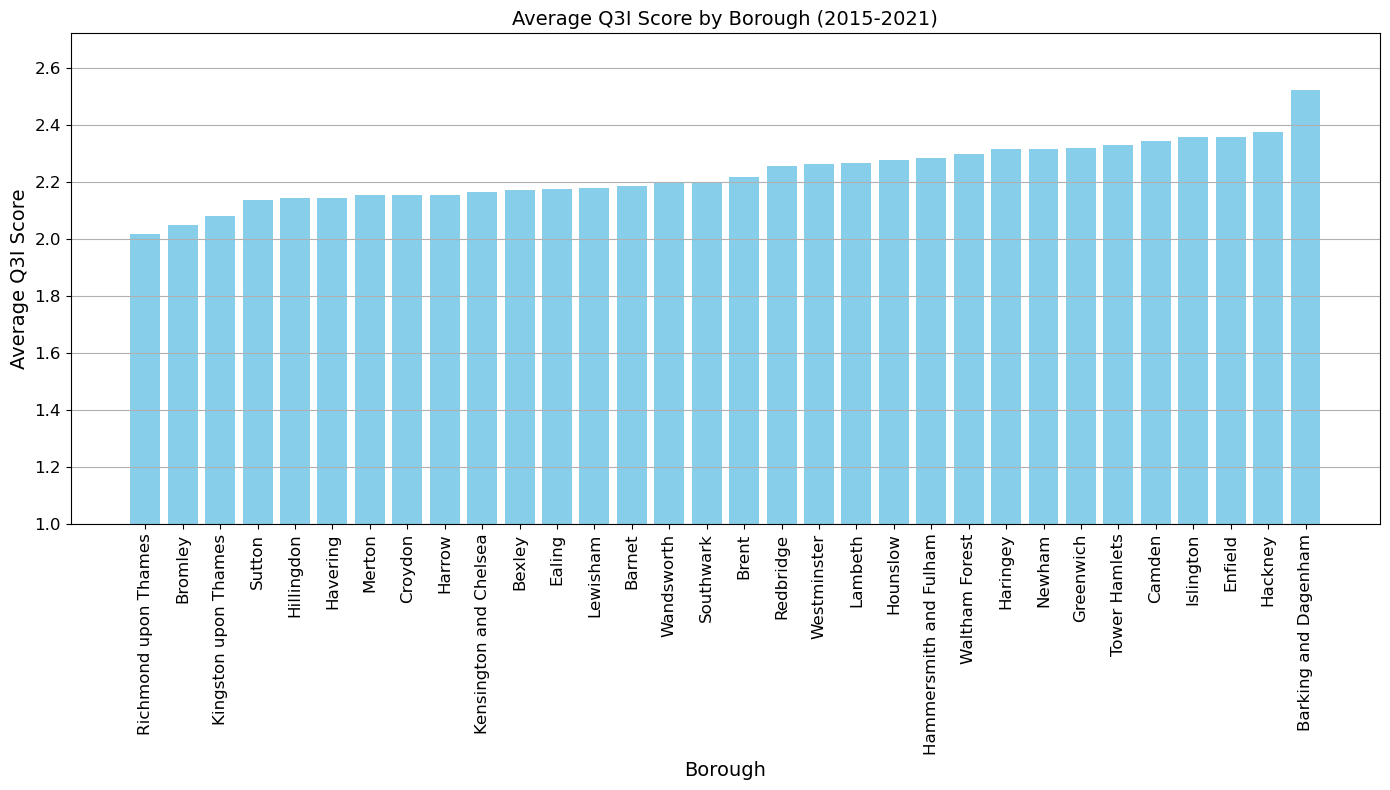

In [14]:
# Filter data for the period from 2020 to 2021
start_date = '2019-01-01'
end_date = '2021-12-31'
mask = (df['Month_Number'] >= start_date) & (df['Month_Number'] <= end_date)
df_filtered = df[mask]

# Group by Borough and calculate the average Q54C score
df_avg = df_filtered.groupby('Borough')['Q3I'].mean().reset_index()

# Sort the boroughs by average Q54C score for better visualization
df_avg = df_avg.sort_values(by='Q3I', ascending=True)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(df_avg['Borough'], df_avg['Q3I'], color='skyblue')

plt.xlabel('Borough', fontsize=14)
plt.ylabel('Average Q3I Score', fontsize=14)
plt.title('Average Q3I Score by Borough (2015-2021)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(1, df_avg['Q3I'].max() + 0.2)  # Start y-axis from 1
plt.grid(axis='y')
plt.savefig('average Q3I score by borough.png')
plt.tight_layout()
plt.show()

Q3F: To what extent do you agree or disagree with these statements? People act with courtesy to each other in public space in this area

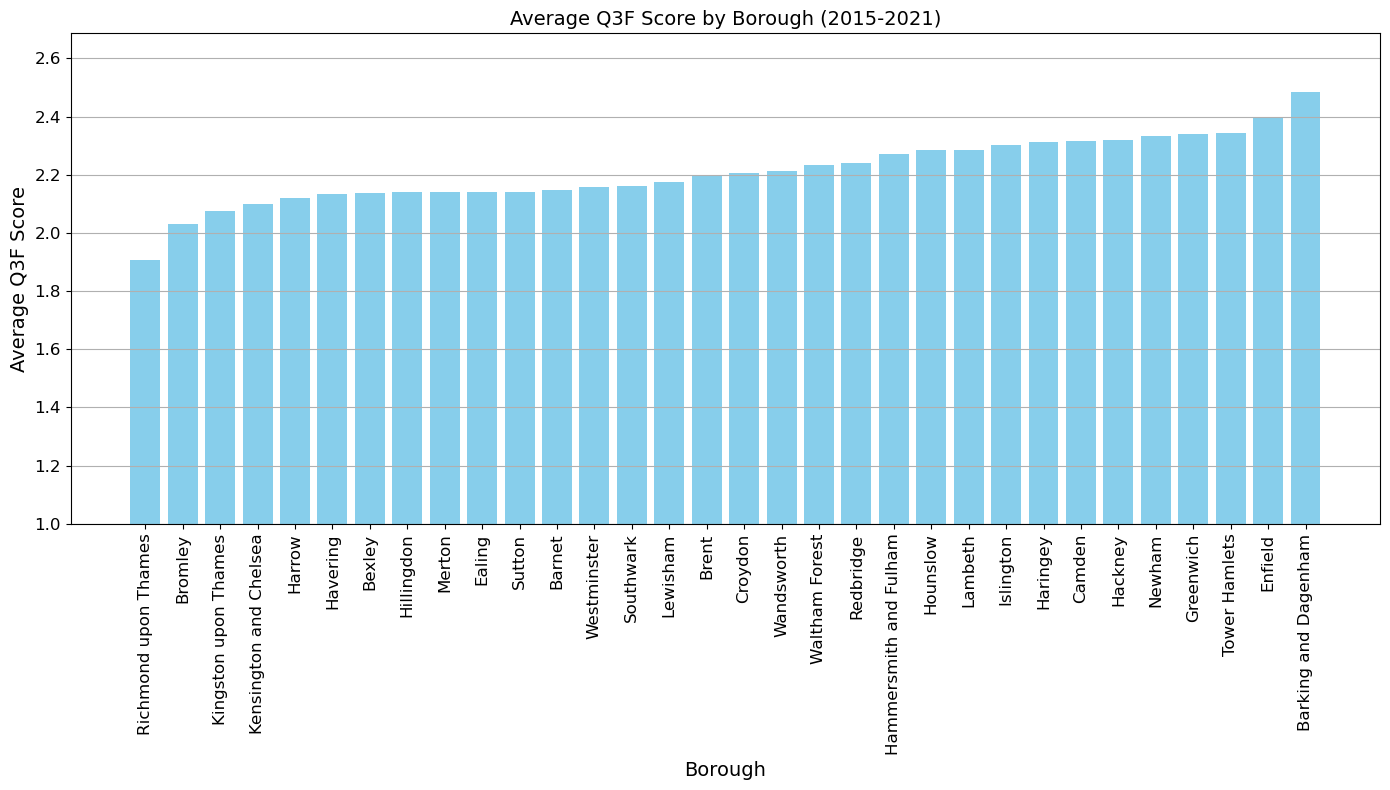

In [15]:
# Filter data for the period from 2020 to 2021
start_date = '2019-01-01'
end_date = '2021-12-31'
mask = (df['Month_Number'] >= start_date) & (df['Month_Number'] <= end_date)
df_filtered = df[mask]

# Group by Borough and calculate the average Q54C score
df_avg = df_filtered.groupby('Borough')['Q3F'].mean().reset_index()

# Sort the boroughs by average Q54C score for better visualization
df_avg = df_avg.sort_values(by='Q3F', ascending=True)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(df_avg['Borough'], df_avg['Q3F'], color='skyblue')

plt.xlabel('Borough', fontsize=14)
plt.ylabel('Average Q3F Score', fontsize=14)
plt.title('Average Q3F Score by Borough (2015-2021)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(1, df_avg['Q3F'].max() + 0.2)  # Start y-axis from 1
plt.grid(axis='y')
plt.savefig('average Q3F score by borough.png')
plt.tight_layout()
plt.show()

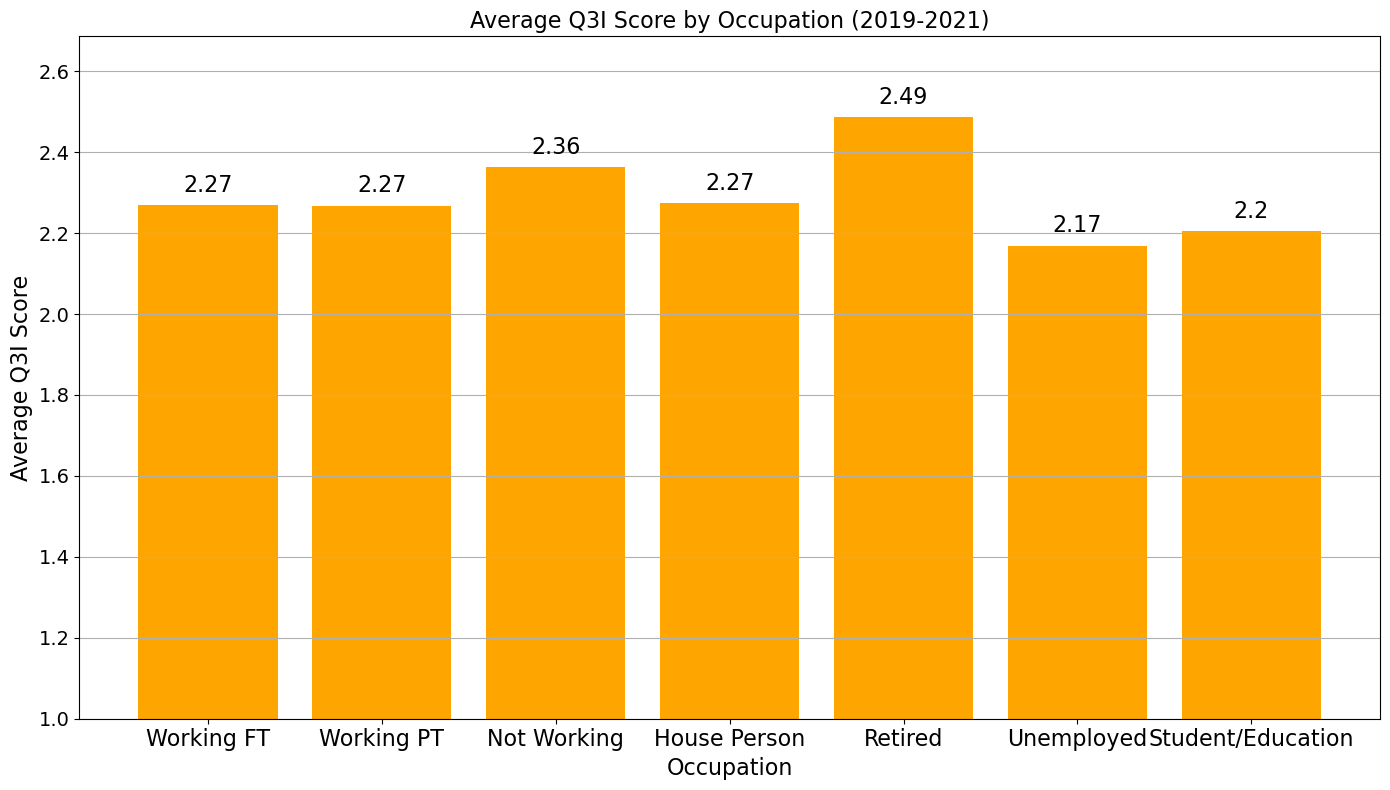

In [47]:
# Filter data for the period from 2019 to 2020
start_date = '2019-01-01'
end_date = '2022-12-31'
mask = (df['Month_Number'] >= start_date) & (df['Month_Number'] <= end_date)
df_filtered = df[mask]

# Filter rows where 'Q139r' is in [1, 2, 3, 4, 5, 6, 7, 8]
df_filtered = df_filtered[df_filtered['Q139r'].isin([1, 2, 3, 4, 5, 6, 7, 8])]

# Group by Occupation and calculate the average Q3I score
df_avg = df_filtered.groupby('Q139r')['Q3I'].mean().reset_index()
print(df_avg)

# Sort the occupations by average Q3I score for better visualization
df_avg = df_avg.sort_values(by='Q3I', ascending=False)

# Mapping occupation codes to labels
occupation_labels = {
    1: 'Working FT',
    2: 'Working PT',
    3: 'Not Working',
    4: 'House Person',
    5: 'Retired',
    6: 'Unemployed',
    7: 'Student/Education',
    8: 'Other'
}

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(df_avg['Q139r'], df_avg['Q3I'], color='orange')

# Adding the specific values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=16)

plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Average Q3I Score', fontsize=16)
plt.title('Average Q3I Score by Occupation (2019-2021)', fontsize=16)
plt.xticks(ticks=df_avg['Q139r'], labels=[occupation_labels[occ] for occ in df_avg['Q139r']], rotation=0, fontsize=16)
plt.yticks(fontsize=14)
plt.ylim(1, df_avg['Q3I'].max() + 0.2)  # Start y-axis from 1 and add more space on top
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('average_Q3I_score_by_occupation.png')
plt.show()

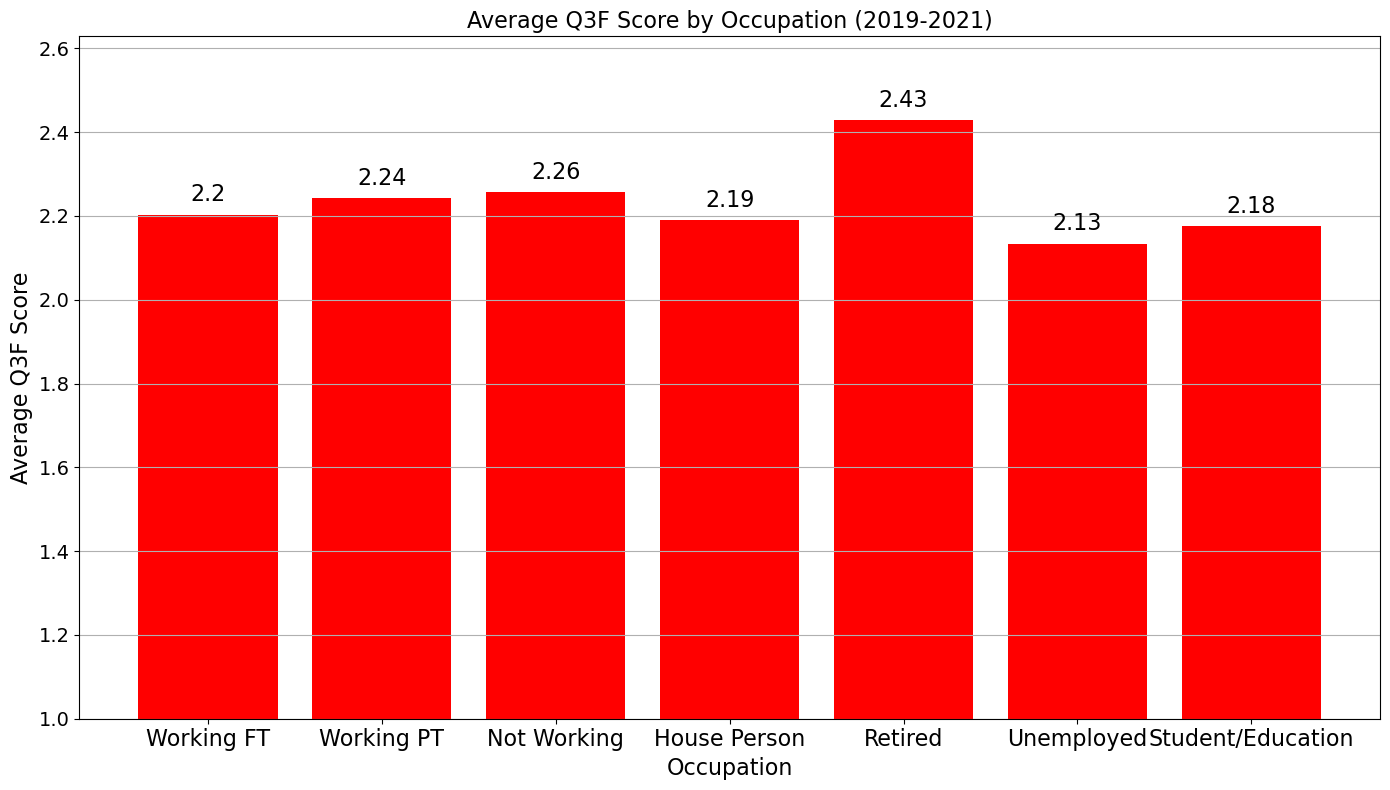

In [48]:
# Filter data for the period from 2019 to 2020
start_date = '2019-01-01'
end_date = '2021-12-31'
mask = (df['Month_Number'] >= start_date) & (df['Month_Number'] <= end_date)
df_filtered = df[mask]

# Filter rows where 'Q139r' is in [1, 2, 3, 4, 5, 6, 7, 8]
df_filtered = df_filtered[df_filtered['Q139r'].isin([1, 2, 3, 4, 5, 6, 7, 8])]

# Group by Occupation and calculate the average Q3F score
df_avg = df_filtered.groupby('Q139r')['Q3F'].mean().reset_index()

# Sort the occupations by average Q3F score for better visualization
df_avg = df_avg.sort_values(by='Q3F', ascending=False)

# Mapping occupation codes to labels
occupation_labels = {
    1: 'Working FT',
    2: 'Working PT',
    3: 'Not Working',
    4: 'House Person',
    5: 'Retired',
    6: 'Unemployed',
    7: 'Student/Education',
    8: 'Other'
}

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(df_avg['Q139r'], df_avg['Q3F'], color='red')

# Adding the specific values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom', fontsize=16)

plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Average Q3F Score', fontsize=16)
plt.title('Average Q3F Score by Occupation (2019-2021)', fontsize=16)
plt.xticks(ticks=df_avg['Q139r'], labels=[occupation_labels[occ] for occ in df_avg['Q139r']], rotation=0, fontsize=16)
plt.yticks(fontsize=14)
plt.ylim(1, df_avg['Q3F'].max() + 0.2)  # Start y-axis from 1 and add more space on top
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('average_Q3F_score_by_occupation.png')
plt.show()

In [49]:
# Calculate the Pearson correlation coefficient between Q60 and Q3I
correlation = df['Q60'].corr(df['Q3I'])

print(f'The Pearson correlation coefficient between Q60 and Q3I is {correlation}')

The Pearson correlation coefficient between Q60 and Q3I is 0.23981341838250664


In [51]:
# Calculate the Pearson correlation coefficient between Q60 and Q3I
correlation = df['Q60'].corr(df['Q3F'])

print(f'The Pearson correlation coefficient between Q60 and Q3F is {correlation}')

The Pearson correlation coefficient between Q60 and Q3F is 0.23943651793183346
